In [362]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [363]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('diamonds.csv')
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53937 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53938 non-null  float64
 5   table    53937 non-null  float64
 6   price    53937 non-null  float64
 7   x        53939 non-null  float64
 8   y        53939 non-null  float64
 9   z        53936 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [365]:
cualitativas=data.iloc[ : , [1,2,3]]
cualitativas

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [366]:
cuantitativas=data.iloc[ : , [0,4,5,6,7,8,9]]
cuantitativas

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,NaN,58.0,2757.0,6.15,6.12,3.74


In [367]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75-percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite Superior permitido", Limite_Superior_iqr)
print("Limite Inferior permitido", Limite_Inferior_iqr)

Limite Superior permitido carat        2.000
depth       64.750
table       63.500
price    11887.500
x            9.285
y            9.270
z            5.735
dtype: float64
Limite Inferior permitido carat      -0.560
depth      58.750
table      51.500
price   -5612.500
x           1.965
y           1.990
z           1.215
dtype: float64


In [368]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas1=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Cuantitativas1

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,NaN,58.0,2757.0,6.15,6.12,3.74


In [369]:
# Identificar valores nulos por columna después de eliminar outliers
valores_nulos_outliers = Cuantitativas1.isnull().sum()
valores_nulos_outliers

carat    1892
depth    2547
table     608
price    3541
x          33
y          30
z          53
dtype: int64

In [370]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos copia del df
Cuantitativas_limpio=Cuantitativas1.copy()
Cuantitativas_limpio=Cuantitativas_limpio.fillna(round(Cuantitativas1.mean(),1))
Cuantitativas_limpio

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,61.8,57.4,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.8,58.0,2757.0,6.15,6.12,3.74


In [371]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cuantitativas_limpio.isnull().sum()
valores_nulos_final

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [372]:
#Unimos  'cualitativas' con el dataframe

Datos_limpios = pd.concat([cualitativas,Cuantitativas_limpio], axis=1)
Datos_limpios

,cut,color,clarity,carat,depth,table,price,x,y,z
0,Ideal,E,SI2,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,Premium,E,SI1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,Good,E,VS1,0.23,61.8,57.4,327.0,4.05,4.07,2.31
3,Premium,I,VS2,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,Good,J,SI2,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,Ideal,D,SI1,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,Good,D,SI1,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,Very Good,D,SI1,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,Premium,H,SI2,0.86,61.8,58.0,2757.0,6.15,6.12,3.74


In [373]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos_final=Datos_limpios.isnull().sum()
valores_nulos_final

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Correlación y Regresión Lineal

In [374]:
import seaborn as sns

In [375]:
#Correlaciones entre las variables
Corr_Factors=Cuantitativas_limpio.corr()
Corr_Factors

,carat,depth,table,price,x,y,z
carat,1.000000,0.026168,0.172385,0.823447,0.879079,0.878421,0.879034
depth,0.026168,1.000000,-0.229437,0.007540,-0.019331,-0.021017,0.071473
table,0.172385,-0.229437,1.000000,0.129427,0.195386,0.190847,0.160594
price,0.823447,0.007540,0.129427,1.000000,0.771248,0.772223,0.768653
x,0.879079,-0.019331,0.195386,0.771248,1.000000,0.998229,0.988885
y,0.878421,-0.021017,0.190847,0.772223,0.998229,1.000000,0.988991
z,0.879034,0.071473,0.160594,0.768653,0.988885,0.988991,1.000000


In [376]:
#Valor absoluto de todas las correlaciones entre las variables
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,carat,depth,table,price,x,y,z
carat,1.000000,0.026168,0.172385,0.823447,0.879079,0.878421,0.879034
depth,0.026168,1.000000,0.229437,0.007540,0.019331,0.021017,0.071473
table,0.172385,0.229437,1.000000,0.129427,0.195386,0.190847,0.160594
price,0.823447,0.007540,0.129427,1.000000,0.771248,0.772223,0.768653
x,0.879079,0.019331,0.195386,0.771248,1.000000,0.998229,0.988885
y,0.878421,0.021017,0.190847,0.772223,0.998229,1.000000,0.988991
z,0.879034,0.071473,0.160594,0.768653,0.988885,0.988991,1.000000


<Axes: >

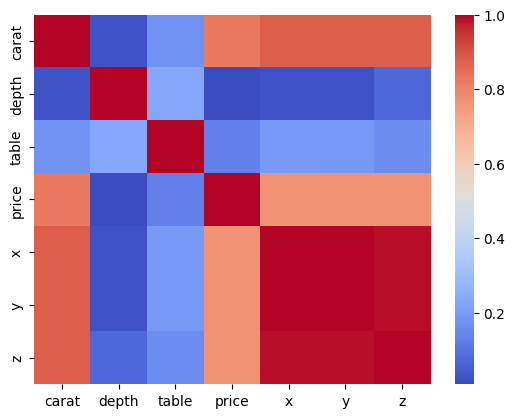

In [377]:
#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map

In [378]:
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      53940 non-null  object 
 1   color    53940 non-null  object 
 2   clarity  53940 non-null  object 
 3   carat    53940 non-null  float64
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


price vs carat

<Axes: xlabel='carat', ylabel='price'>

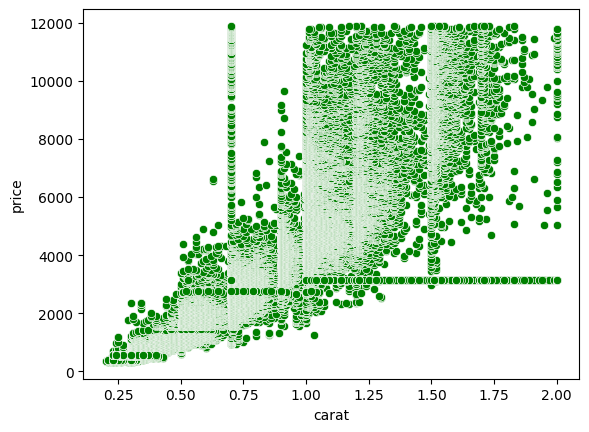

In [379]:
sns.scatterplot(x="carat",y="price",color="green",data=Datos_limpios)

In [380]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep=Datos_limpios[["carat"]]
Var_Dep=Datos_limpios["price"]

In [381]:
#Definir modelo como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep,y=Var_Dep)

LinearRegression()

In [382]:
#Evaluamos la eficiencia del modelo obtenido por medio del coefieciente R Determinacion
model.score(Vars_Indep,Var_Dep)


0.6780656048990964

In [383]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6780656048990964

In [384]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8234473904865425

Price vs Depth

<Axes: xlabel='depth', ylabel='price'>

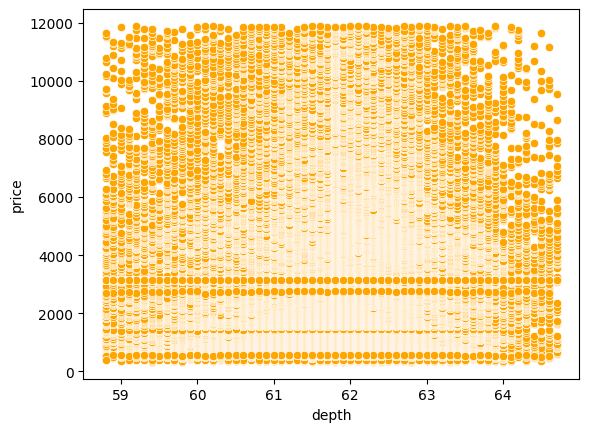

In [385]:
sns.scatterplot(x="depth",y="price",color="orange",data=Datos_limpios)

In [386]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep=Datos_limpios[["depth"]]
Var_Dep=Datos_limpios["price"]

In [387]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep,y=Var_Dep)

LinearRegression()

In [388]:
#Evaluamos la eficiencia del modelo obtenido por medio del coefieciente R Determinacion
model.score(Vars_Indep,Var_Dep)

5.684760248725329e-05

In [389]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

5.684760248725329e-05

In [390]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.007539734908287777

table vs price

<Axes: xlabel='table', ylabel='price'>

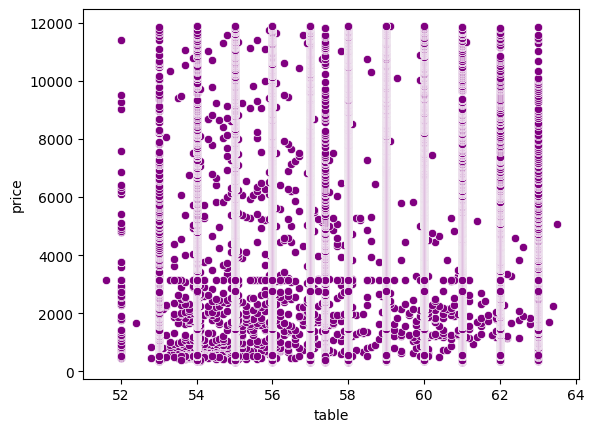

In [391]:
sns.scatterplot(x="table",y="price",color="purple",data=Datos_limpios)

In [392]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep=Datos_limpios[["table"]]
Var_Dep=Datos_limpios["price"]

In [393]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep,y=Var_Dep)


LinearRegression()

In [394]:
#Evaluamos la eficiencia del modelo obtenido por medio del coefieciente R Determinacion
model.score(Vars_Indep,Var_Dep)

0.016751238700028148

In [395]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.016751238700028148

In [396]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12942657648268438

Correlación entre todas las variables antes seleccionadas

In [397]:
Cuantitativas_nuevo=Datos_limpios.iloc[:,[4,5,6]]

In [398]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=Cuantitativas_nuevo.corr()
Corr_Factors

,depth,table,price
depth,1.000000,-0.229437,0.007540
table,-0.229437,1.000000,0.129427
price,0.007540,0.129427,1.000000


<Axes: >

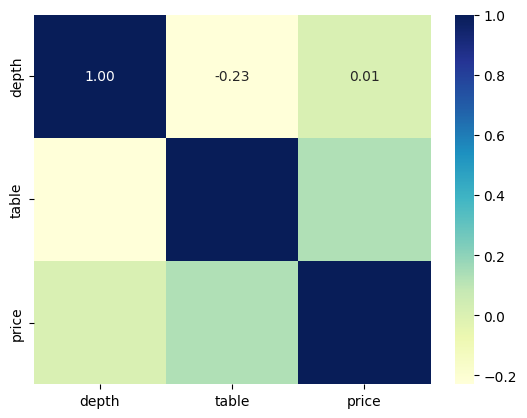

In [399]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map

price vs tamaño (x, y, z)

<Axes: xlabel='x', ylabel='price'>

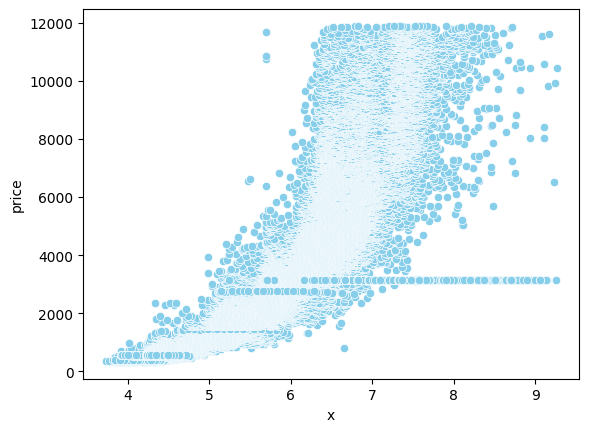

In [400]:
sns.scatterplot(x='x', y='price', color="skyblue", data=Datos_limpios)

In [401]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Datos_limpios[['x', 'y', 'z']]
Var_Dep= Datos_limpios['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [402]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x', 'y', 'z'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([  15.06322854, 1310.58400148,  871.6930534 ]),
 'rank_': 3,
 'singular_': array([398.24712315,  21.34378523,  10.8718399 ]),
 'intercept_': -7523.42503859564}

In [403]:
##Modelo matemático: y= 15.06322854 + 1310.58400148 + 871.6930534 - 7523.42503859564

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.5974392744194048

In [404]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5974392744194048

In [405]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7729419605762161

Correlaciones Múltiples

In [406]:
from turtle import color

price vs Carat vs depth

<Axes: xlabel='carat', ylabel='price'>

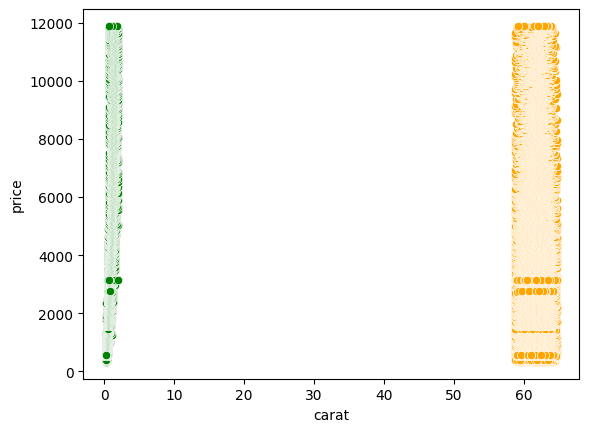

In [407]:
sns.scatterplot(x='carat', y='price', color="green", data=Datos_limpios)
sns.scatterplot(x='depth', y='price', color="orange", data=Datos_limpios)

In [408]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Datos_limpios[['carat', 'depth']]
Var_Dep= Datos_limpios['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [409]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'depth'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([5573.49610206,  -34.37388049]),
 'rank_': 2,
 'singular_': array([253.17628695,  91.72216579]),
 'intercept_': 1119.8781556635008}

In [410]:
##Modelo matemático: y= 5573.49610206 - -34.37388049 + 1119.8781556635008

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)


0.6782619738447302

In [411]:

#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.6782619738447302

In [412]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8235666177333381

price vs Carat vs table   

<Axes: xlabel='carat', ylabel='price'>

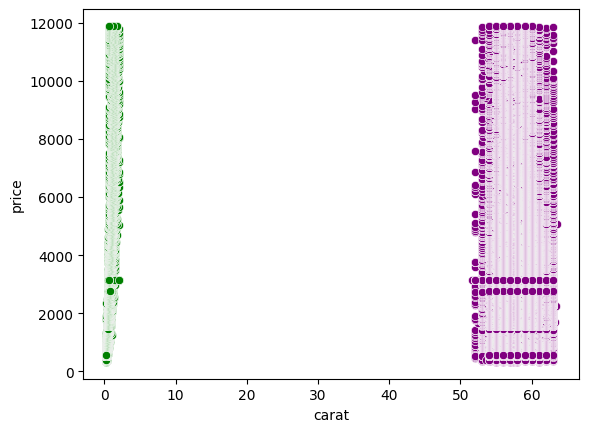

In [413]:
sns.scatterplot(x='carat', y='price', color="green", data=Datos_limpios)
sns.scatterplot(x='table', y='price', color="purple", data=Datos_limpios)

In [414]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Datos_limpios[['carat', 'table']]
Var_Dep= Datos_limpios['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [415]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([5586.06779494,  -16.72665672]),
 'rank_': 2,
 'singular_': array([479.31031205,  90.33362807]),
 'intercept_': -53.37332594056488}

In [416]:
##Modelo matemático: y= 5586.06779494 - 16.72665672 - 53.37332594056488

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.6782272534322933

In [417]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter



0.6782272534322933

In [418]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8235455381654941

price vs depth vs table 

<Axes: xlabel='depth', ylabel='price'>

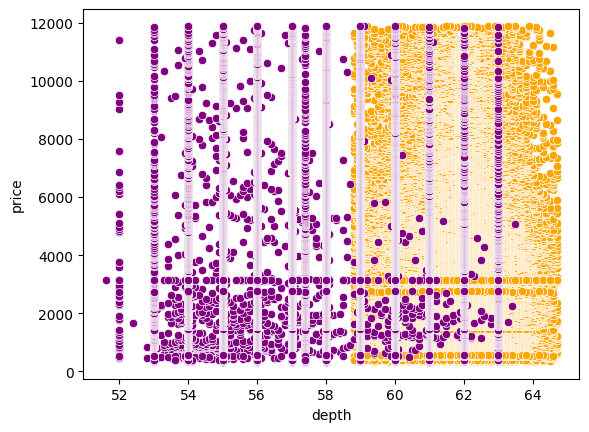

In [419]:
sns.scatterplot(x='depth', y='price', color="orange", data=Datos_limpios)
sns.scatterplot(x='table', y='price', color="purple", data=Datos_limpios)

In [420]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Datos_limpios[['depth', 'table']]
Var_Dep= Datos_limpios['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [421]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 96.37856156, 179.41050331]),
 'rank_': 2,
 'singular_': array([483.77141345, 243.99951304]),
 'intercept_': -13087.638340534535}

In [422]:
##Modelo matemático: y= 96.37856156 + 179.41050331 - 13087.638340534535

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.018214724283157957

In [423]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.018214724283157957

In [424]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.13496193642341517

price vs tamaño (x, y, z)

<Axes: xlabel='x', ylabel='price'>

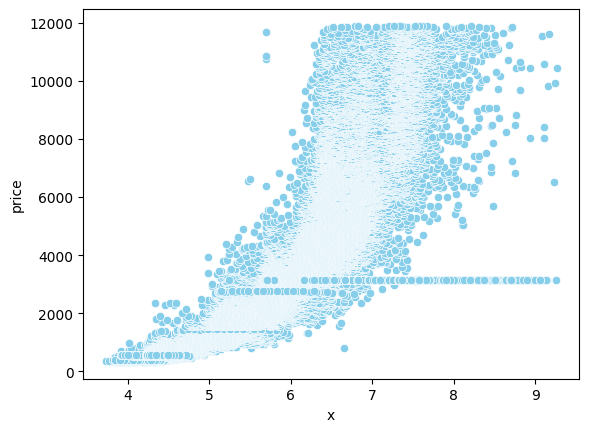

In [425]:
sns.scatterplot(x='x', y='price', color="skyblue", data=Datos_limpios)

price vs tamaño vs carat vs depth                         

<Axes: xlabel='y', ylabel='price'>

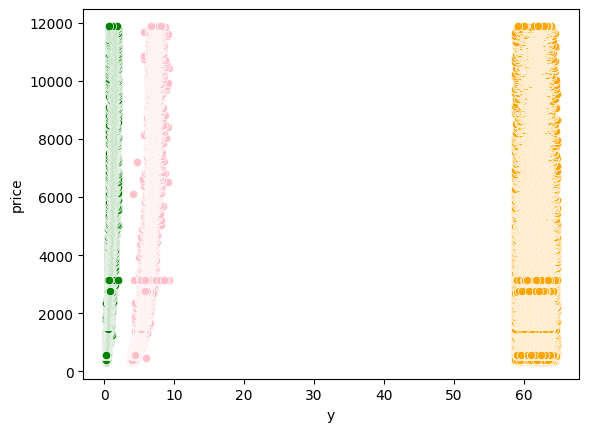

In [426]:
sns.scatterplot(x='y', y='price', color="pink", data=Datos_limpios)
sns.scatterplot(x='carat', y='price', color="green", data=Datos_limpios)
sns.scatterplot(x='depth', y='price', color="orange", data=Datos_limpios)

In [427]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Datos_limpios[['y','carat','depth']]
Var_Dep= Datos_limpios['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [428]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['y', 'carat', 'depth'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 513.89955022, 4304.90252572,  -11.35489296]),
 'rank_': 3,
 'singular_': array([270.42524719, 252.92083865,  41.60631113]),
 'intercept_': -2300.359577744322}

In [429]:
##Modelo matemático: y= 513.89955022 + 4304.90252572 - 11.35489296 - 2300.359577744322

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.6885529373165473

In [430]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.13496193642341517

price vs tamaño vs carat vs depth vs table

<Axes: xlabel='z', ylabel='price'>

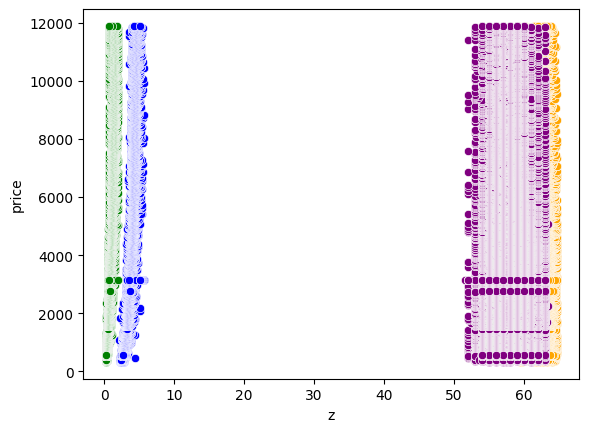

In [431]:
sns.scatterplot(x='z', y='price', color="blue", data=Datos_limpios)
sns.scatterplot(x='carat', y='price', color="green", data=Datos_limpios)
sns.scatterplot(x='depth', y='price', color="orange", data=Datos_limpios)
sns.scatterplot(x='table', y='price', color="purple", data=Datos_limpios)

In [432]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Datos_limpios[['z','carat','depth', 'table']]
Var_Dep= Datos_limpios['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [433]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['z', 'carat', 'depth', 'table'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 792.11082928, 4387.05795008,  -71.18663111,  -28.26910203]),
 'rank_': 4,
 'singular_': array([484.74535791, 245.87090234, 175.16208864,  38.6640741 ]),
 'intercept_': 3099.6043547315335}

In [434]:
##Modelo matemático: y= 792.11082928 + 4387.05795008 - 71.18663111 - 28.26910203 + 3099.6043547315335

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.6878978396143784